In [300]:
import seaborn as sns
import matplotlib as plt
from wordcloud import WordCloud
import pandas  as pd
import matplotlib.pyplot as plt


In [312]:
data_cleaned_all=pd.read_csv('data_cleaned_all.csv')
data_cleaned_genre=pd.read_csv('data_cleaned_genre.csv')
data_cleaned_tags=pd.read_csv('data_cleaned_tags.csv')
data_cleaned_genre = data_cleaned_genre[data_cleaned_genre['Genre'] != 'Free to play']

data_cleaned_all

,Name,Review,Genre,Tags,Developer,Publisher,Price,release_date,Total Number Of Reviews
0,Palworld,Very Positive,"['Action, Adventure, Indie, RPG, Early Access']","['Single-player', 'Online Co-op', 'Steam Achie...",Pocketpair,Pocketpair,14.99,2024-01-18,187133.0
1,Counter-Strike 2,Very Positive,"['Action, Free to Play']","['Cross-Platform Multiplayer', 'Steam Trading ...",Valve,Valve,0.00,2012-08-21,7871062.0
2,Ready or Not,Very Positive,"['Action, Adventure, Indie']","['Single-player', 'Online Co-op', 'Steam Cloud']",VOID Interactive,VOID Interactive,21.74,2023-12-13,124768.0
3,NARAKA: BLADEPOINT,Mostly Positive,"['Action, Adventure, Massively Multiplayer']","['Online PvP', 'In-App Purchases']",24 Entertainment,NetEase Games Global,0.00,2021-08-12,199601.0
4,Lethal Company,Overwhelmingly Positive,"['Action, Adventure, Indie, Early Access']","['Single-player', 'Online Co-op']",Zeekerss,Zeekerss,5.79,2023-10-24,261544.0
...,...,...,...,...,...,...,...,...,...
2391,Aliens versus Predator Classic 2000,Very Positive,['Action'],['Single-player'],Rebellion,Rebellion,4.99,2000-03-28,2190.0
2392,ARMA: Cold War Assault,Very Positive,"['Action, Simulation, Strategy']",['Single-player'],Bohemia Interactive,Bohemia Interactive,4.99,2011-08-09,1968.0
2393,Solace Crafting,Mostly Positive,"['Adventure, Indie, RPG']","['Single-player', 'Online Co-op', 'LAN Co-op',...",Big Kitty Games,Big Kitty Games,14.99,2022-08-02,741.0
2394,Homeseek,Mixed,"['Indie, Simulation, Strategy']","['Single-player', 'Online PvP', 'Steam Achieve...",Traptics,The Iterative Collective,12.49,2023-07-20,143.0


In [302]:
data_cleaned_genre.head()

,Name,Genre,Price,Review
0,Palworld,Action,14.99,Very Positive
1,Palworld,Adventure,14.99,Very Positive
2,Palworld,Indie,14.99,Very Positive
3,Palworld,RPG,14.99,Very Positive
4,Palworld,Early Access,14.99,Very Positive


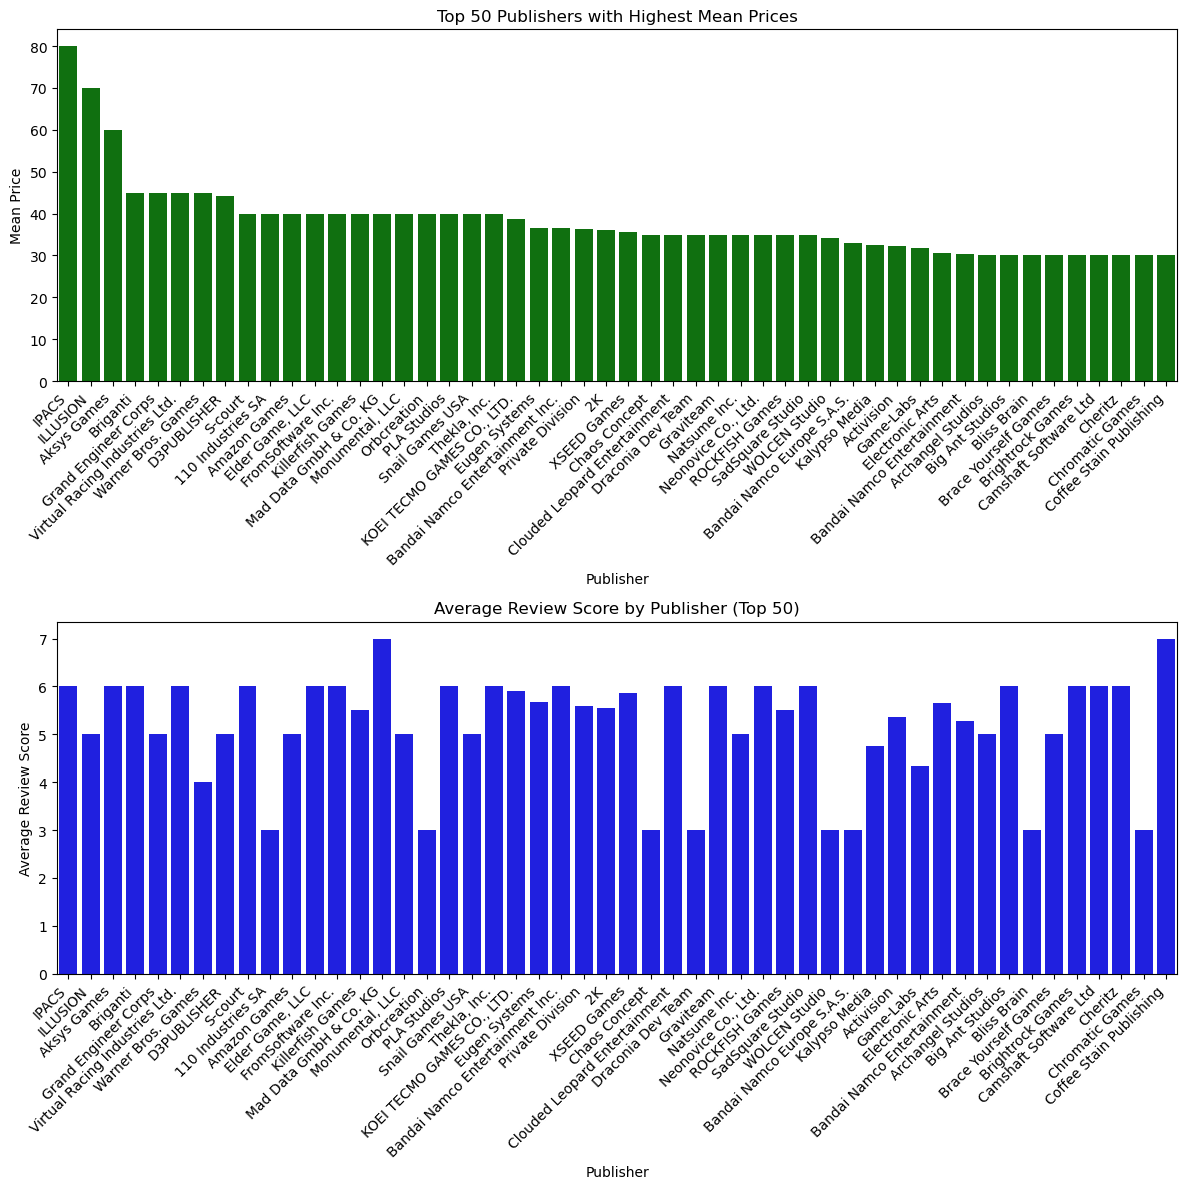

In [341]:
#define the custom sorting order for review categories
custom_sort = {
    'Overwhelmingly Positive': 7,
    'Very Positive': 6,
    'Mostly Positive': 5,
    'Positive': 4,
    'Mixed': 3,
    'Mostly Negative': 2,
    'Very Negative': 1,
    'Overwhelmingly Negative': 0
}

#map the reversed custom sorting order to the 'Review' column
data_cleaned_all['Review_encoded'] = data_cleaned_all['Review'].map(custom_sort)
#initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'Review_encoded' column
data_cleaned_all['Review_encoded'] = label_encoder.fit_transform(data_cleaned_all['Review_encoded'])

#1
#calculate the mean price for each group (publisher)
publisher_price_mean = data_cleaned_all.groupby('Publisher')['Price'].mean()
#select the top 50 publishers with the highest mean prices
top_50_publishers = publisher_price_mean.nlargest(50)

#group by publisher and calculate the mean encoded review score
publisher_price_review_mean = data_cleaned_all.groupby('Publisher').agg({'Price': 'mean', 'Review_encoded': 'mean'})

#select the top 50 publishers with the highest mean price
top_50_publishers_reviews = publisher_price_review_mean.nlargest(50, 'Price')

plt.figure(figsize=(12, 12))

# top 50 publishers with highest mean prices
plt.subplot(2, 1, 1)
sns.barplot(x=top_50_publishers.index, y=top_50_publishers.values, color='green')
plt.xlabel('Publisher')
plt.ylabel('Mean Price')
plt.title('Top 50 Publishers with Highest Mean Prices')
plt.xticks(rotation=45, ha='right')

# average encoded review score by publisher (Top 50)
plt.subplot(2, 1, 2)
sns.barplot(x=top_50_publishers_reviews.index, y=top_50_publishers_reviews['Review_encoded'], color='blue')
plt.xlabel('Publisher')
plt.ylabel('Average Review Score')
plt.title('Average Review Score by Publisher (Top 50)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  


In [268]:
custom_sort_order = {
    'Overwhelmingly Positive': 0,
    'Very Positive': 1,
    'Mostly Positive': 2,
    'Positive': 3,
    'Mixed': 4,
    'Mostly Negative': 5,
    'Very Negative': 6,
    'Overwhelmingly Negative': 7
}


In [269]:
print(sorted_data['Review'].unique())

[0 1 2 3 4 6 7 8]


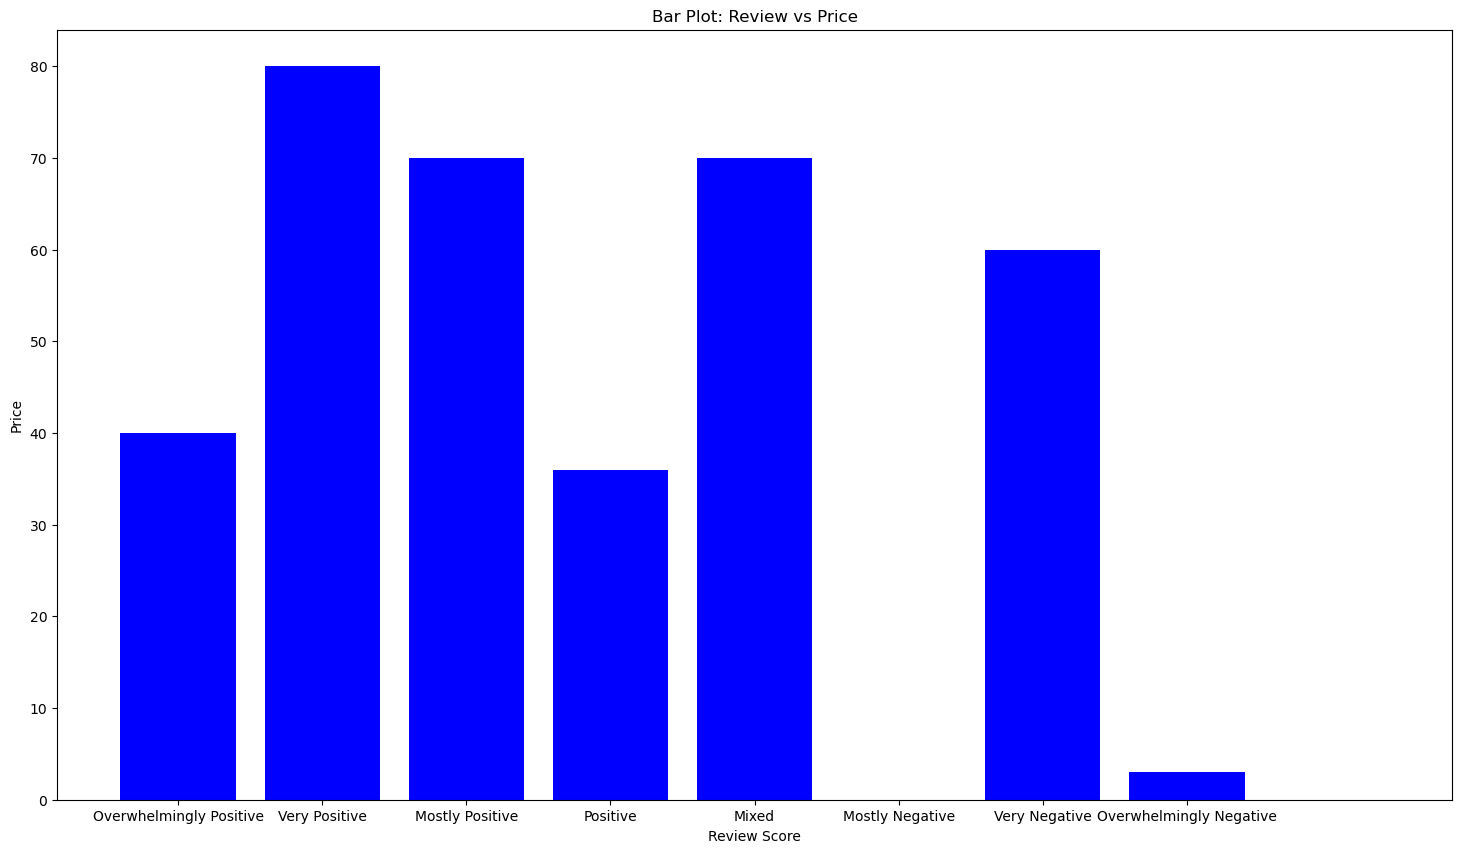

In [270]:
# Plotting
plt.figure(figsize=(18, 10))
plt.bar(sorted_data['Review'], sorted_data['Price'], color='blue')
plt.xlabel('Review Score')
plt.ylabel('Price')
plt.title('Bar Plot: Review vs Price')
plt.xticks(range(len(custom_sort_order)), custom_sort_order.keys())
plt.show()

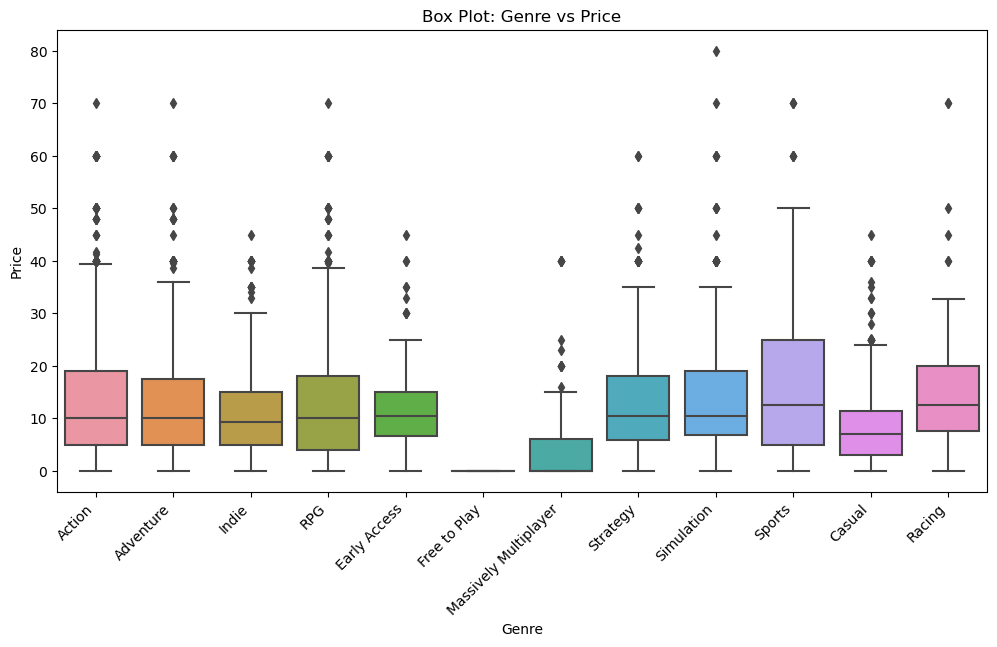

In [313]:

# Assuming data_cleaned_genre is your DataFrame containing 'Genre' and 'Price' columns
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Price', data=data_cleaned_genre)
plt.xlabel('Genre')
plt.ylabel('Price')
plt.title('Box Plot: Genre vs Price')
plt.xticks(rotation=45, ha='right')
plt.show()

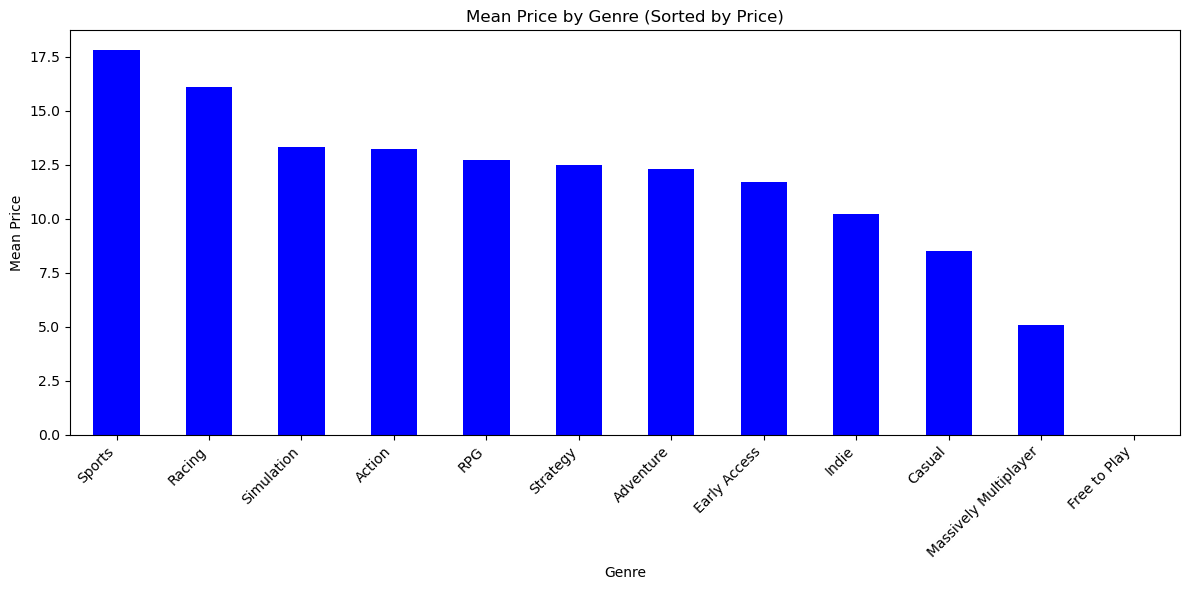

In [314]:
genre_price_mean = data_cleaned_genre.groupby('Genre')['Price'].mean()

# Sort the mean prices in descending order
sorted_genre_price_mean = genre_price_mean.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sorted_genre_price_mean.plot(kind='bar', color='blue')
plt.xlabel('Genre')
plt.ylabel('Mean Price')
plt.title('Mean Price by Genre (Sorted by Price)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

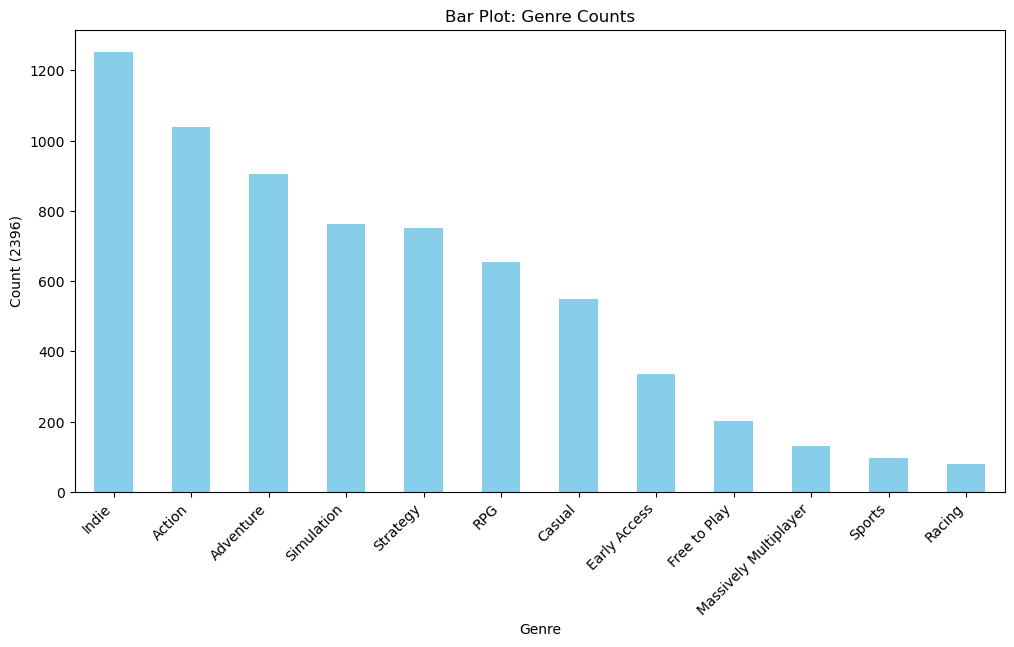

In [315]:
genre_counts = data_cleaned_genre['Genre'].value_counts()
plt.figure(figsize=(12, 6))

genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count (2396)')
plt.title('Bar Plot: Genre Counts')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1600x600 with 0 Axes>

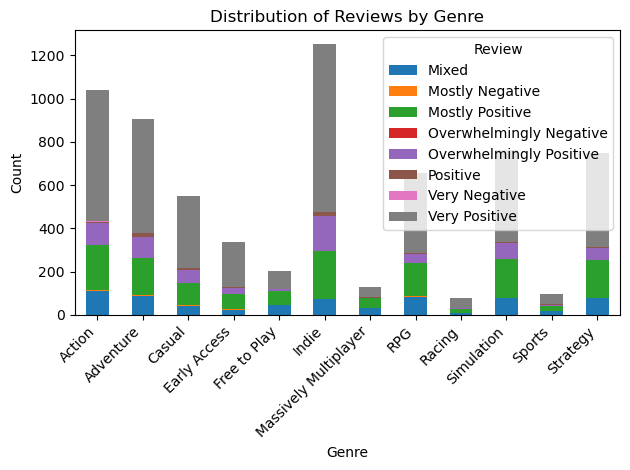

In [316]:
grouped_data = data_cleaned_genre.groupby(['Genre', 'Review']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Reviews by Genre')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Review')
plt.tight_layout()
plt.show()

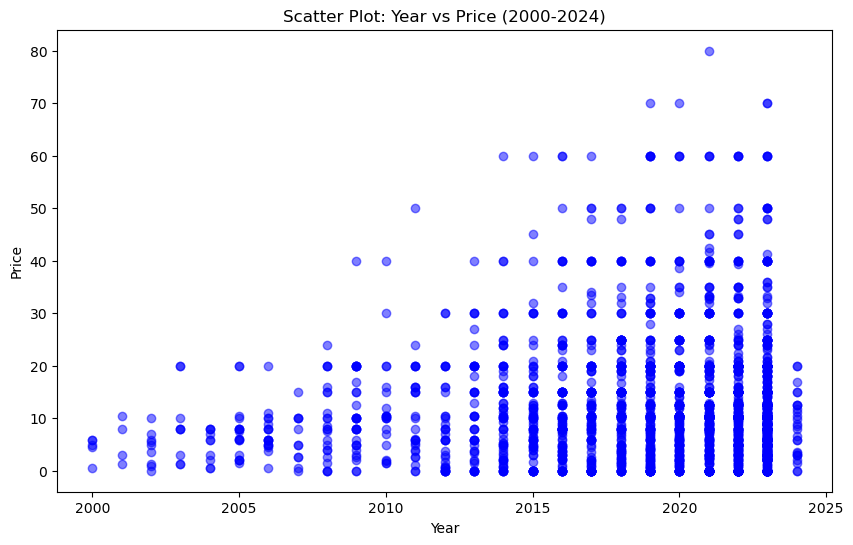

In [288]:
data_cleaned_all['release_date'] = pd.to_datetime(data_cleaned_all['release_date'])

# extract the year from the release_date column
data_cleaned_all['release_year'] = data_cleaned_all['release_date'].dt.year

# filter the data for the selected years
filtered_data = data_cleaned_all[data_cleaned_all['release_year'].between(2000, 2024)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['release_year'], filtered_data['Price'], color='blue', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot: Year vs Price (2000-2024)')
plt.show()

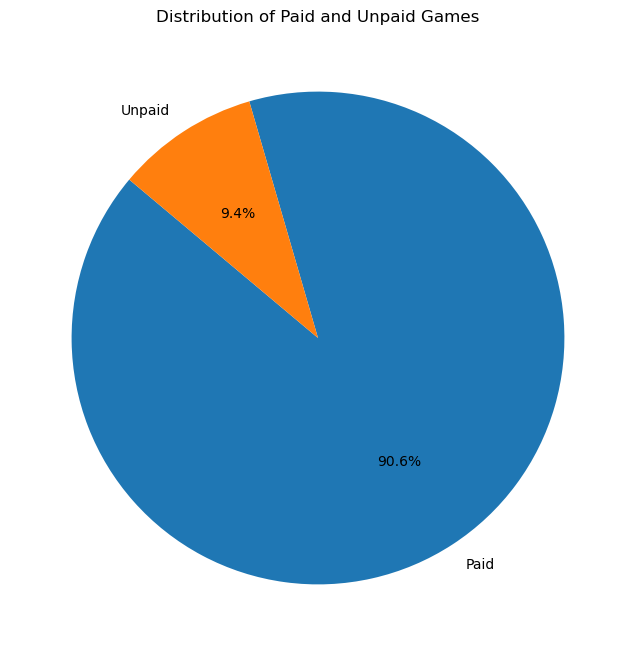

In [317]:
data_cleaned_all['Payment'] = data_cleaned_all['Price'].apply(lambda x: 'Paid' if x > 0 else 'Unpaid')

# count the number of paid and unpaid games
payment_counts = data_cleaned_all['Payment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Paid and Unpaid Games')
plt.show()

In [329]:
publisher_price_review_mean

,Price,Review_encoded
Publisher,,
(Myco),3.990000,7.000000
(none),19.990000,5.000000
0 Deer Soft Partnership,0.000000,6.000000
02GAMES,4.990000,6.000000
0UP GAMES,8.990000,7.000000
...,...,...
桑尼游戏(Sunny Game),4.890000,6.000000
樂磚Joy Brick,12.490000,6.000000
香港商河洛互動娛樂股份有限公司,12.490000,6.000000


In [330]:
top_50_publishers.index

Index(['IPACS', 'ILLUSION', 'Aksys Games', 'Briganti', 'Grand Engineer Corps',
       'Virtual Racing Industries Ltd.', 'Warner Bros. Games', 'D3PUBLISHER',
       'S-court', '110 Industries SA', 'Amazon Games', 'Elder Game, LLC',
       'FromSoftware Inc.', 'Killerfish Games', 'Mad Data GmbH & Co. KG',
       'Monumental, LLC', 'Orbcreation', 'PLA Studios', 'Snail Games USA',
       'Thekla, Inc.', 'KOEI TECMO GAMES CO., LTD.', 'Eugen Systems',
       'Bandai Namco Entertainment Inc.', 'Private Division', '2K',
       'XSEED Games', 'Chaos Concept', 'Clouded Leopard Entertainment',
       'Draconia Dev Team', 'Graviteam', 'Natsume Inc.', 'Neonovice Co., Ltd.',
       'ROCKFISH Games', 'SadSquare Studio', 'WOLCEN Studio',
       'Bandai Namco Europe S.A.S.', 'Kalypso Media', 'Activision',
       'Game-Labs', 'Electronic Arts', 'Bandai Namco Entertainment',
       'Archangel Studios', 'Big Ant Studios', 'Bliss Brain',
       'Brace Yourself Games', 'Brightrock Games', 'Camshaft Software

In [331]:
top_50_publishers.values

array([79.99      , 69.99      , 59.99      , 44.99      , 44.99      ,
       44.99      , 44.99      , 44.27571429, 40.        , 39.99      ,
       39.99      , 39.99      , 39.99      , 39.99      , 39.99      ,
       39.99      , 39.99      , 39.99      , 39.99      , 39.99      ,
       38.61727273, 36.65666667, 36.49      , 36.43      , 35.99      ,
       35.56142857, 34.99      , 34.99      , 34.99      , 34.99      ,
       34.99      , 34.99      , 34.99      , 34.99      , 34.11      ,
       32.99      , 32.49      , 32.35363636, 31.65666667, 30.57882353,
       30.27571429, 29.99      , 29.99      , 29.99      , 29.99      ,
       29.99      , 29.99      , 29.99      , 29.99      , 29.99      ])

In [333]:
top_50_publishers_reviews.index

Index(['IPACS', 'ILLUSION', 'Aksys Games', 'Briganti', 'Grand Engineer Corps',
       'Virtual Racing Industries Ltd.', 'Warner Bros. Games', 'D3PUBLISHER',
       'S-court', '110 Industries SA', 'Amazon Games', 'Elder Game, LLC',
       'FromSoftware Inc.', 'Killerfish Games', 'Mad Data GmbH & Co. KG',
       'Monumental, LLC', 'Orbcreation', 'PLA Studios', 'Snail Games USA',
       'Thekla, Inc.', 'KOEI TECMO GAMES CO., LTD.', 'Eugen Systems',
       'Bandai Namco Entertainment Inc.', 'Private Division', '2K',
       'XSEED Games', 'Chaos Concept', 'Clouded Leopard Entertainment',
       'Draconia Dev Team', 'Graviteam', 'Natsume Inc.', 'Neonovice Co., Ltd.',
       'ROCKFISH Games', 'SadSquare Studio', 'WOLCEN Studio',
       'Bandai Namco Europe S.A.S.', 'Kalypso Media', 'Activision',
       'Game-Labs', 'Electronic Arts', 'Bandai Namco Entertainment',
       'Archangel Studios', 'Big Ant Studios', 'Bliss Brain',
       'Brace Yourself Games', 'Brightrock Games', 'Camshaft Software

In [342]:
top_50_publishers_reviews

,Price,Review_encoded
Publisher,,
IPACS,79.990000,6.000000
ILLUSION,69.990000,5.000000
Aksys Games,59.990000,6.000000
Briganti,44.990000,6.000000
Grand Engineer Corps,44.990000,5.000000
Virtual Racing Industries Ltd.,44.990000,6.000000
Warner Bros. Games,44.990000,4.000000
D3PUBLISHER,44.275714,5.000000
S-court,40.000000,6.000000


In [343]:
top_50_publishers_reviews.index


Index(['IPACS', 'ILLUSION', 'Aksys Games', 'Briganti', 'Grand Engineer Corps',
       'Virtual Racing Industries Ltd.', 'Warner Bros. Games', 'D3PUBLISHER',
       'S-court', '110 Industries SA', 'Amazon Games', 'Elder Game, LLC',
       'FromSoftware Inc.', 'Killerfish Games', 'Mad Data GmbH & Co. KG',
       'Monumental, LLC', 'Orbcreation', 'PLA Studios', 'Snail Games USA',
       'Thekla, Inc.', 'KOEI TECMO GAMES CO., LTD.', 'Eugen Systems',
       'Bandai Namco Entertainment Inc.', 'Private Division', '2K',
       'XSEED Games', 'Chaos Concept', 'Clouded Leopard Entertainment',
       'Draconia Dev Team', 'Graviteam', 'Natsume Inc.', 'Neonovice Co., Ltd.',
       'ROCKFISH Games', 'SadSquare Studio', 'WOLCEN Studio',
       'Bandai Namco Europe S.A.S.', 'Kalypso Media', 'Activision',
       'Game-Labs', 'Electronic Arts', 'Bandai Namco Entertainment',
       'Archangel Studios', 'Big Ant Studios', 'Bliss Brain',
       'Brace Yourself Games', 'Brightrock Games', 'Camshaft Software

In [344]:
top_50_publishers_reviews['Review_encoded']

Publisher
IPACS                              6.000000
ILLUSION                           5.000000
Aksys Games                        6.000000
Briganti                           6.000000
Grand Engineer Corps               5.000000
Virtual Racing Industries Ltd.     6.000000
Warner Bros. Games                 4.000000
D3PUBLISHER                        5.000000
S-court                            6.000000
110 Industries SA                  3.000000
Amazon Games                       5.000000
Elder Game, LLC                    6.000000
FromSoftware Inc.                  6.000000
Killerfish Games                   5.500000
Mad Data GmbH & Co. KG             7.000000
Monumental, LLC                    5.000000
Orbcreation                        3.000000
PLA Studios                        6.000000
Snail Games USA                    5.000000
Thekla, Inc.                       6.000000
KOEI TECMO GAMES CO., LTD.         5.909091
Eugen Systems                      5.666667
Bandai Namco Entertain